In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv("ratings.csv", header=0, names=['user_id', 'movie_id', 'rating', 'timestamp'])


In [ ]:
dataset

In [16]:

# Need to map movie ID to [1, num_movies]
movie_id_to_new_id = dict()
id = 1
for index, row in dataset.iterrows():
    if movie_id_to_new_id.get(row['movie_id']) is None:
        movie_id_to_new_id[row['movie_id']] = id
        dataset.at[index, 'movie_id'] = id
        id += 1
    else:
        dataset.at[index, 'movie_id'] = movie_id_to_new_id.get(row['movie_id'])

num_users = len(dataset.user_id.unique())
num_movies = len(dataset.movie_id.unique())
train, test = train_test_split(dataset, test_size=0.2)

print('Number of movies', num_movies)
print('Number of users', num_users)


Number of movies 9724
Number of users 610


In [ ]:
#dataset

In [ ]:
train.head()

In [ ]:
test.head()

In [ ]:
!pip install pydot

# MATRIX FACTORIZATION

In [12]:
from keras.models import Model
from keras.layers import Embedding, Flatten, Input, dot

# Let's use a higher latent dimension.
latent_dim = 10

# Define model inputs
movie_input = Input(shape=[1], name='movie-input')
user_input = Input(shape=[1], name='user-input')

# Define embeddings for movies and users
movie_embedding = Embedding(num_movies + 1, latent_dim, name='movie-embedding')(movie_input)
user_embedding = Embedding(num_users + 1, latent_dim, name='user-embedding')(user_input)

# Flatten the embeddings
movie_vec = Flatten(name='movie-flatten')(movie_embedding)
user_vec = Flatten(name='user-flatten')(user_embedding)

# Compute dot product of movie and user embeddings
prod = dot([movie_vec, user_vec], axes=-1, normalize=False, name='dot-product')

# Define the model
model = Model([user_input, movie_input], prod)

# Display the model summary
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ movie-input (InputLayer)      │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ user-input (InputLayer)       │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ movie-embedding (Embedding)   │ (None, 1, 10)             │          97,250 │ movie-input[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ user-embedding (Embedding)    │ (None, 1, 10)             │           6,110 │ user-input[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ movie-flatten (Flatten)       │ (None, 10)                │               0 │ movie-embedding[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ user-flatten (Flatten)        │ (None, 10)                │               0 │ user-embedding[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dot-product (Dot)             │ (None, 1)                 │               0 │ movie-flatten[0][0],       │
│                               │                           │                 │ user-flatten[0][0]         │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 103,360 (403.75 KB)

 Trainable params: 103,360 (403.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2521/2521 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 12.8207
Epoch 2/10
2521/2521 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 4.6146
Epoch 3/10
2521/2521 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 2.0791
Epoch 4/10
2521/2521 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 1.3820
Epoch 5/10
2521/2521 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 1.0663
Epoch 6/10
2521/2521 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.9053
Epoch 7/10
2521/2521 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.8079
Epoch 8/10
2521/2521 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.7460
Epoch 9/10
2521/2521 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.7046
Epoch 10/10
2521/2521 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.6718


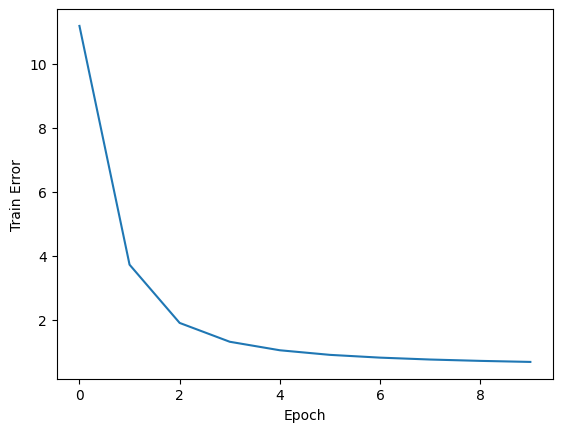

631/631 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Mean Absolute Error: 0.7876110670670463


In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit([train.user_id, train.movie_id], train.rating, epochs=10)

# Plot training loss
plt.plot(history.history['loss'])
plt.xlabel("Epoch")
plt.ylabel("Train Error")
plt.show()

# Evaluate the model
y_hat = np.round(model.predict([test.user_id, test.movie_id]), decimals=2)
y_true = test.rating
mae = mean_absolute_error(y_true, y_hat)
print("Mean Absolute Error:", mae)


In [14]:
y_hat

array([[ 4.18],
       [ 3.83],
       [ 3.06],
       ...,
       [ 3.46],
       [ 3.12],
       [-0.11]], dtype=float32)

In [15]:
y_true

13416    4.0
75114    4.0
93790    2.5
12601    5.0
15915    3.5
        ... 
21283    3.0
25709    5.0
3091     5.0
17007    4.0
70493    2.5
Name: rating, Length: 20168, dtype: float64

In [ ]:
from keras.constraints import non_neg
from keras.layers import Dot
from keras.models import Model
from keras.layers import Embedding, Flatten, Input

latent_dim = 5

movie_input = Input(shape=[1], name='movie-input')
movie_embedding = Embedding(num_movies + 1, latent_dim, name='movie-embedding',
                            embeddings_constraint=non_neg())(movie_input)
movie_vec = Flatten(name='movie-flatten')(movie_embedding)

user_input = Input(shape=[1], name='user-input')
user_embedding = Embedding(num_users + 1, latent_dim, name='user-embedding',
                           embeddings_constraint=non_neg())(user_input)
user_vec = Flatten(name='user-flatten')(user_embedding)

prod = Dot(axes=-1, normalize=False, name='dot-product')([movie_vec, user_vec])

model = Model([user_input, movie_input], prod)
model.compile('adam', 'mean_squared_error')




# NEURAL NETWORK WITH MF

In [ ]:
from keras.models import Model
from keras.layers import Embedding, Flatten, Input, Dot, Dropout, Dense
from keras.optimizers import Adam
#from tensorflow.keras.optimizers import Adam

latent_dim = 10

movie_input = Input(shape=[1], name='movie-input')
movie_embedding = Embedding(num_movies + 1, latent_dim, name='movie-embedding')(movie_input)
movie_vec = Flatten(name='movie-flatten')(movie_embedding)

user_input = Input(shape=[1], name='user-input')
user_embedding = Embedding(num_users + 1, latent_dim, name='user-embedding')(user_input)
user_vec = Flatten(name='user-flatten')(user_embedding)

dot_product = Dot(axes=-1, name='dot-product')([movie_vec, user_vec])

concat_dropout = Dropout(0.2)(dot_product)
fc_1 = Dense(100, name='fc-1', activation='relu')(concat_dropout)
fc_1_dropout = Dropout(0.2, name='fc-1-dropout')(fc_1)
fc_2 = Dense(50, name='fc-2', activation='relu')(fc_1_dropout)
fc_2_dropout = Dropout(0.2, name='fc-2-dropout')(fc_2)
fc_3 = Dense(1, name='fc-3', activation='relu')(fc_2_dropout)

model = Model([user_input, movie_input], fc_3)
model.compile(optimizer=Adam(learning_rate=0.1), loss='mean_squared_error')

# Print the model summary
model.summary()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

history = model.fit([train.user_id, train.movie_id], train.rating, epochs=10)

plt.plot(history.history['loss'])
plt.xlabel("Epoch")
plt.ylabel("Train Error")
plt.show()

y_hat = np.round(model.predict([test.user_id, test.movie_id]), decimals=2)
y_true = test.rating
mae = mean_absolute_error(y_true, y_hat)
print("Mean Absolute Error:", mae)


In [ ]:
y_true

In [ ]:
y_hat

# MLP

In [ ]:
from keras.models import Model
from keras.layers import Embedding, Flatten, Input, Dropout, Dense, BatchNormalization, Concatenate, Dot
from keras.optimizers import Adam

latent_dim = 10

# Define inputs
movie_input = Input(shape=[1], name='movie-input')
user_input = Input(shape=[1], name='user-input')

# MLP Embeddings
movie_embedding_mlp = Embedding(num_movies + 1, latent_dim, name='movie-embedding-mlp')(movie_input)
movie_vec_mlp = Flatten(name='flatten-movie-mlp')(movie_embedding_mlp)

user_embedding_mlp = Embedding(num_users + 1, latent_dim, name='user-embedding-mlp')(user_input)
user_vec_mlp = Flatten(name='flatten-user-mlp')(user_embedding_mlp)

# MF Embeddings
movie_embedding_mf = Embedding(num_movies + 1, latent_dim, name='movie-embedding-mf')(movie_input)
movie_vec_mf = Flatten(name='flatten-movie-mf')(movie_embedding_mf)

user_embedding_mf = Embedding(num_users + 1, latent_dim, name='user-embedding-mf')(user_input)
user_vec_mf = Flatten(name='flatten-user-mf')(user_embedding_mf)

# MLP layers
concat = Concatenate(name='concat')([movie_vec_mlp, user_vec_mlp])
concat_dropout = Dropout(0.2)(concat)
fc_1 = Dense(100, name='fc-1', activation='relu')(concat_dropout)
fc_1_bn = BatchNormalization(name='batch-norm-1')(fc_1)
fc_1_dropout = Dropout(0.2)(fc_1_bn)
fc_2 = Dense(50, name='fc-2', activation='relu')(fc_1_dropout)
fc_2_bn = BatchNormalization(name='batch-norm-2')(fc_2)
fc_2_dropout = Dropout(0.2)(fc_2_bn)

# Prediction from both layers
pred_mlp = Dense(10, name='pred-mlp', activation='relu')(fc_2_dropout)
pred_mf = Dot(axes=-1, name='pred-mf')([movie_vec_mf, user_vec_mf])
combine_mlp_mf = Concatenate(name='combine-mlp-mf')([pred_mf, pred_mlp])

# Final prediction
result = Dense(1, name='result', activation='relu')(combine_mlp_mf)

model = Model([user_input, movie_input], result)
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_absolute_error')

# Since we're not using visualization, there's no need for the following lines:
# SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))


In [ ]:
model.summary()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Train the model
history = model.fit([train.user_id, train.movie_id], train.rating, epochs=10)

# Plot training loss
plt.plot(history.history['loss'])
plt.xlabel("Epoch")
plt.ylabel("Train Error")
plt.show()

# Predict and calculate mean absolute error
y_hat = np.round(model.predict([test.user_id, test.movie_id]), decimals=2)
y_true = test.rating
mean_absolute_error(y_true, y_hat)


In [ ]:
y_hat